In [59]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PreProcessing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv(r"D:\Machine Learning Projects\JamboreeEducation-LinearRegression\Jamboree_Admission.csv",low_memory=False)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
# check the Dataset Size
df.shape

(500, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [63]:
# check the missing values in dataset
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [64]:
# check the duplicates in Dataset
df.duplicated().sum()

np.int64(0)

In [65]:
# statstcal summary of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [66]:
# drop the Serial No as it does not provive an information
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratoty Data Analysis

#### Univariate Analysis

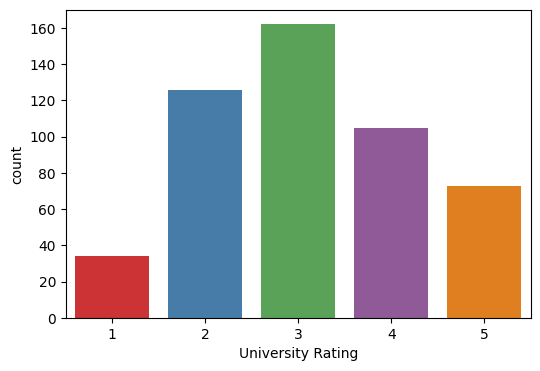

In [67]:
# University Rating Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='University Rating', palette='Set1')
plt.show()

##### Few Univesities are with rank 1 and most of them are between 2 and 4

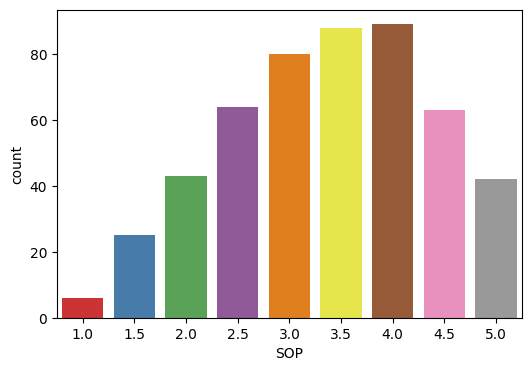

In [68]:
# SOP Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SOP', palette='Set1')
plt.show()

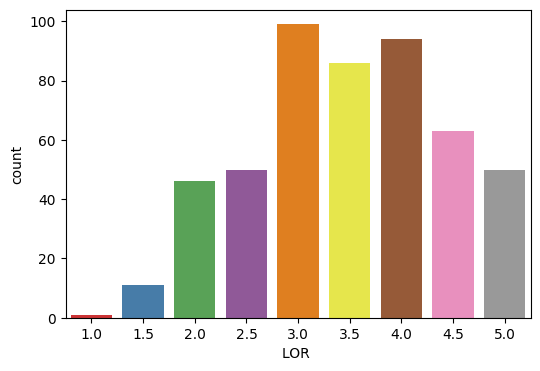

In [69]:
# LOR Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='LOR ', palette='Set1')
plt.show()

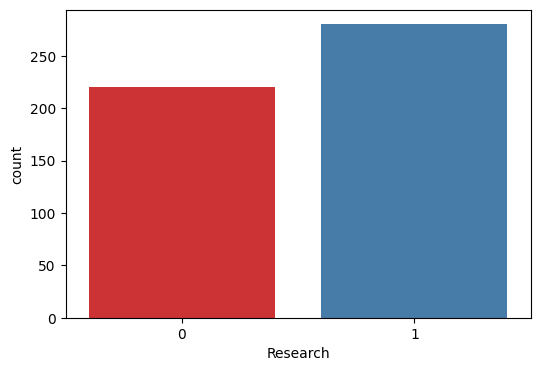

In [70]:
# Research Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Research', palette='Set1')
plt.show()

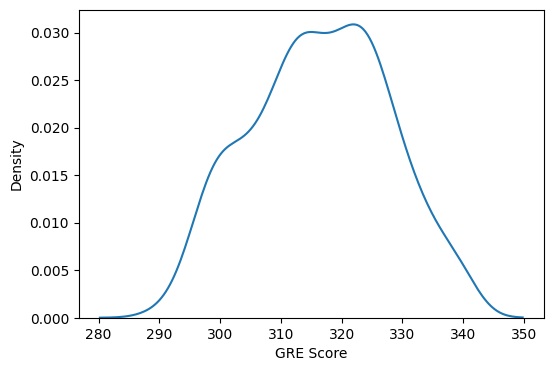

In [71]:
# GRE Score Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='GRE Score')
plt.show()

##### As the above diagram looks close to normal distribution so lets check the outliers

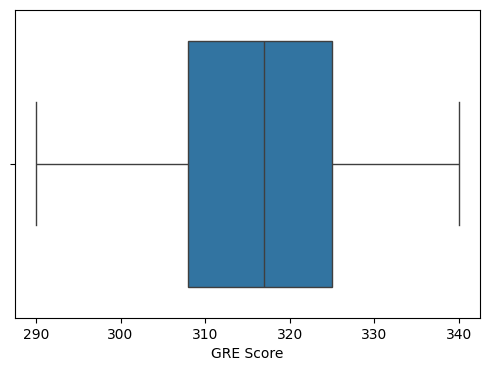

In [72]:
# Checking Outliers in GRE Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='GRE Score')
plt.show()

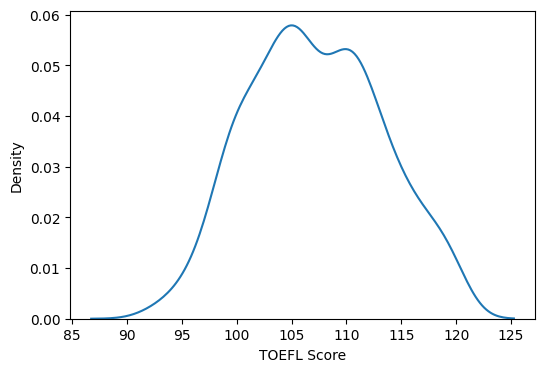

In [73]:
# TOEFL Score Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='TOEFL Score')
plt.show()

##### Here also same like above the diagram looks almost normally distributed so lets check outliers.

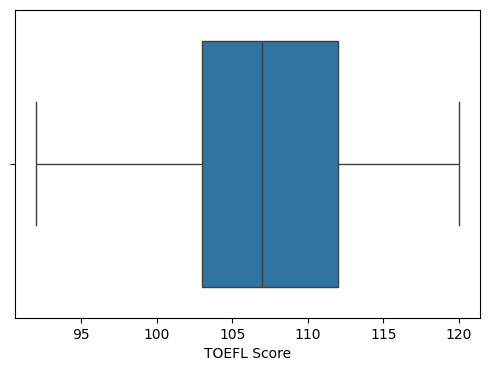

In [74]:
# Checking Outliers in TOEFL Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='TOEFL Score')
plt.show()

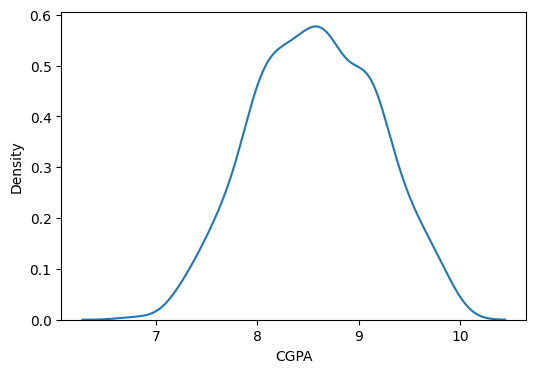

In [75]:
# CGPA Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='CGPA')
plt.show()

##### Here the data looks normally Distributed

#### Bivariate Analysis

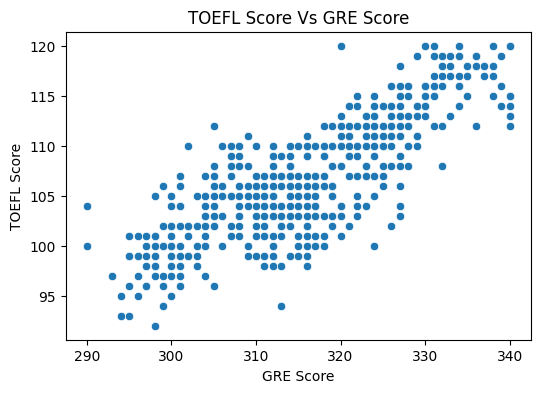

In [76]:
# Analysis on GRE Score and TOEFL Score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score')
plt.title('TOEFL Score Vs GRE Score')
plt.show()

##### The above Graph Shows Positive correlation which means students who have good GRE Score generally have good TOEFL Score as well.

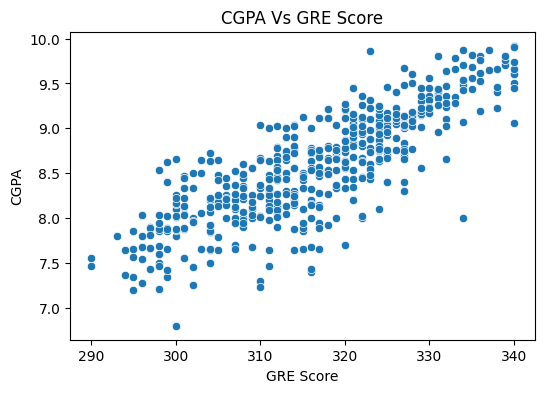

In [77]:
# Analysis on GRE Score and CGPA 
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='GRE Score', y='CGPA')
plt.title('CGPA Vs GRE Score')
plt.show()

##### Here also the graph is showing Positive Correlation which means students who have good CGPA have good GRE Score

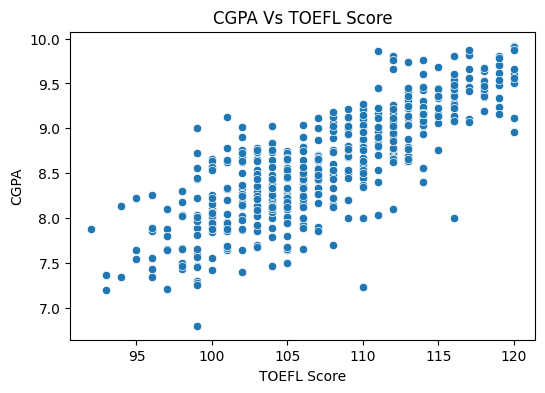

In [78]:
# Analysis on TOEFL Score and CGPA
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TOEFL Score', y='CGPA')
plt.title('CGPA Vs TOEFL Score')
plt.show()

##### Same like above Students who have good CGPA have good TOEFL Score.

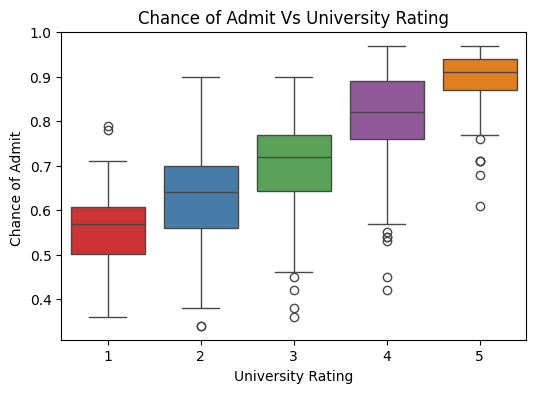

In [79]:
# Analysis on University Rating and Chance of Admit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit ', palette='Set1')
plt.title('Chance of Admit Vs University Rating')
plt.show()

##### University Rating vs Chance of Admit

- Chance of Admit increases with higher University Rating.
- Median and mean admission probability rise consistently from rating 1 to 5.
- This indicates University Rating is a strong predictor of admission chances.

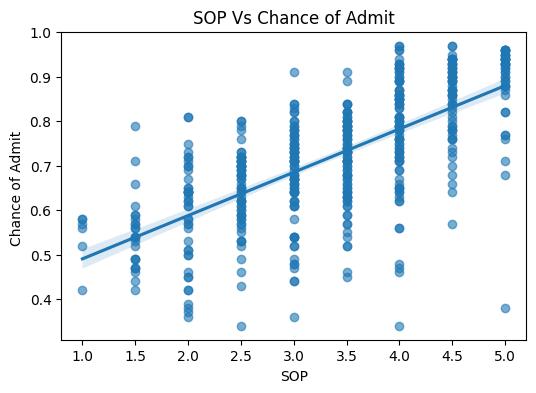

In [80]:
# Analysis on SOP Vs Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='SOP', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('SOP Vs Chance of Admit')
plt.show()

##### SOP vs Chance of Admit

- SOP score shows a positive relationship with Chance of Admit.
- Higher SOP scores are associated with higher admission probability.
- Applicants with SOP scores of 4 and above generally have higher chances of admission.

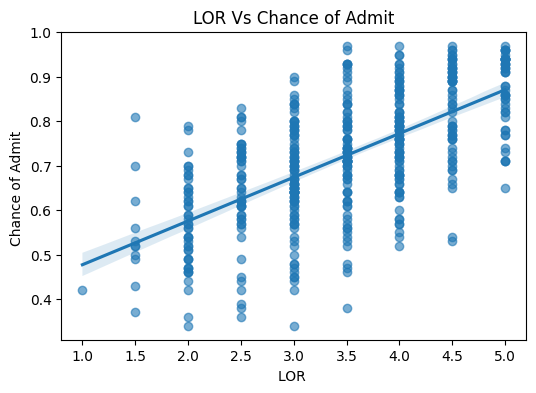

In [81]:
# Analysis on LOR and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='LOR ', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('LOR Vs Chance of Admit')
plt.show()

##### LOR score shows a positive relationship with Chance of Admit, indicating that stronger recommendations are associated with higher admission probability.


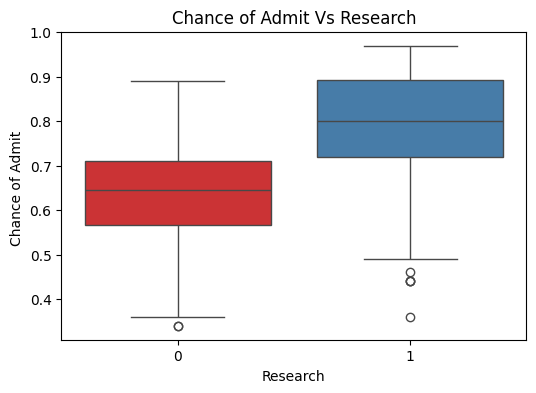

In [82]:
# Analysis on Research and Chance of Admit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Research', y='Chance of Admit ', palette='Set1')
plt.title('Chance of Admit Vs Research')
plt.show()

##### Research vs Chance of Admit

- Applicants with research experience have a higher median Chance of Admit.
- The distribution for candidates with research is shifted upward compared to those without research.
- This indicates that research experience positively influences admission probability.


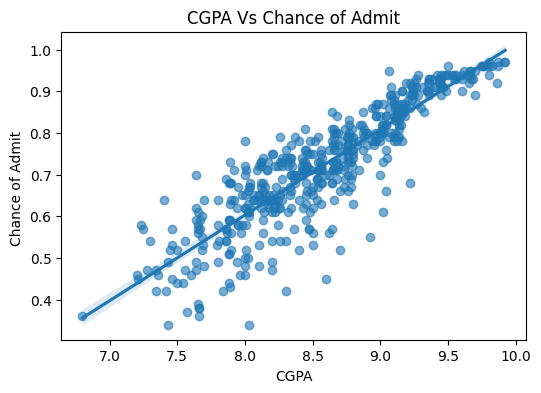

In [83]:
# Analysis on CGPA and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='CGPA', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('CGPA Vs Chance of Admit')
plt.show()

##### CGPA vs Chance of Admit

- CGPA shows a strong positive relationship with Chance of Admit.
- Applicants with higher CGPA tend to have significantly higher admission probability.
- The relationship appears approximately linear, indicating CGPA is a strong predictor.

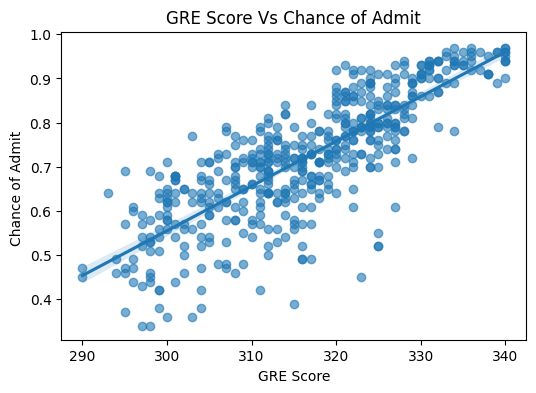

In [84]:
# Analysis on GRE Score and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='GRE Score', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('GRE Score Vs Chance of Admit')
plt.show()

##### GRE Score vs Chance of Admit

- GRE score shows a positive relationship with Chance of Admit.
- Applicants with higher GRE scores generally have a higher probability of admission.
- The relationship appears moderately to strongly linear with some variability.

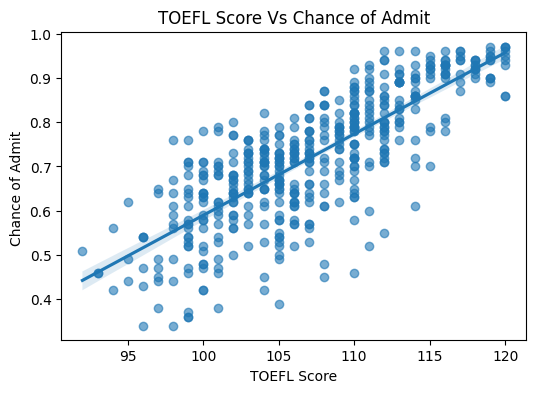

In [85]:
# Analysis on TOEFL Score and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('TOEFL Score Vs Chance of Admit')
plt.show()

##### TOEFL Score vs Chance of Admit

- TOEFL score shows a positive relationship with Chance of Admit.
- Applicants with higher TOEFL scores generally have higher admission probabilities.
- The relationship appears moderately linear, indicating TOEFL is an important predictive feature.

#### Bivariate Analysis Summary

- Most academic and profile-related features show a positive relationship with Chance of Admit.
- CGPA, GRE Score, and TOEFL Score exhibit strong positive correlations with the target variable.
- Research experience significantly increases the median Chance of Admit.
- SOP and LOR show moderate positive influence with some variability.


### Multivariate Analysis

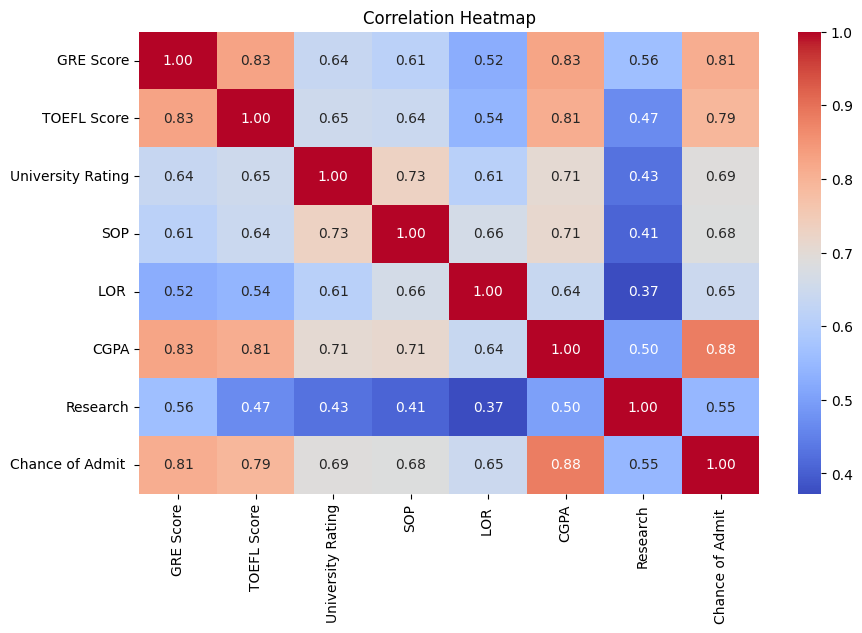

In [86]:
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 800x200 with 0 Axes>

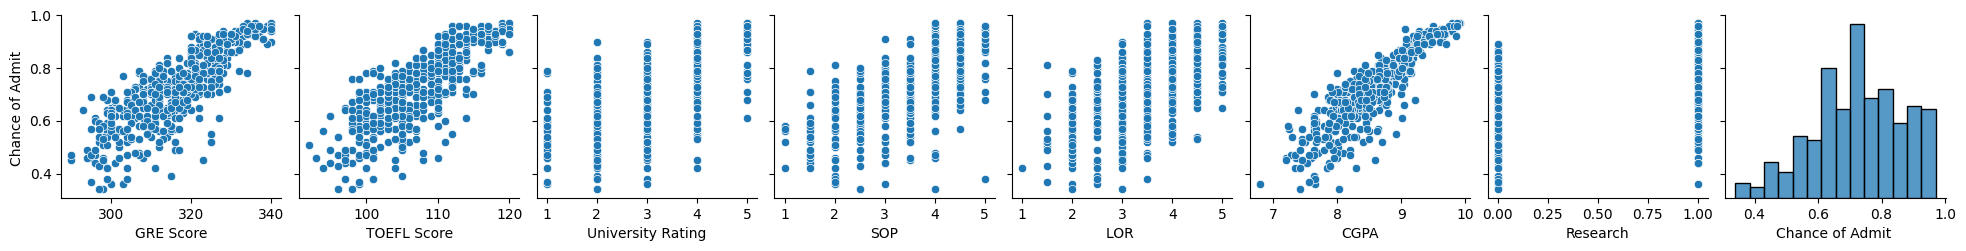

In [87]:
# Pairplot
plt.figure(figsize=(8,2))
sns.pairplot(data=df, y_vars='Chance of Admit ')
plt.show()

#### Multivariate Analysis Insights

- CGPA, GRE Score, and TOEFL Score show strong correlation with Chance of Admit.
- GRE Score and TOEFL Score are highly correlated with each other, indicating potential multicollinearity.
- SOP and LOR show moderate correlation and provide complementary information.
- Research is an important categorical predictor.

### Splitting Data into Train and Test

In [88]:
# Defining X and y
y = df['Chance of Admit ']
X = df.drop('Chance of Admit ',axis=1)
print(y.shape, X.shape)

(500,) (500, 7)


In [89]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 7) (150, 7) (350,) (150,)


### Preprocessing

In [90]:
# Scaling train Data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.956593,-0.519891,1.649207,-0.357817,0.024800,0.436020,0.876172
1,0.772481,0.647601,0.773300,0.664517,1.109785,0.891061,0.876172
2,0.496313,1.147954,1.649207,1.175684,0.567293,0.604554,0.876172
3,-0.700414,0.147247,-0.102606,-0.868984,-0.517693,-0.777421,-1.141329
4,0.404257,0.647601,-0.102606,-0.868984,-0.517693,0.537140,0.876172


In [91]:
# Scaling test Data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.508928,1.815092,1.649207,1.686851,1.652278,1.295541,0.876172
1,-0.516302,-0.853460,-0.102606,1.175684,0.567293,0.098953,0.876172
2,-1.068638,-0.519891,-0.978513,-0.868984,-2.145172,-1.333581,-1.141329
3,2.153320,0.981170,0.773300,1.686851,1.652278,1.952821,0.876172
4,-1.897141,-1.353814,-0.978513,-0.868984,-1.060186,-0.929101,-1.141329


### Modelling

### Linear Regression

In [92]:
# Linear Regression training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [93]:
# Prediction using Linear Regression
y_hat = model.predict(X_test_scaled)
print(y_hat[:10])

[0.9309531  0.72489282 0.53403236 0.97671545 0.54601857 0.62187632
 0.81149089 0.58454954 0.5074575  0.6253587 ]


In [94]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.02855889 0.01386771 0.00594525 0.00079125 0.01848337 0.06714229
 0.01316864]
Intercept: 0.7224857142857144


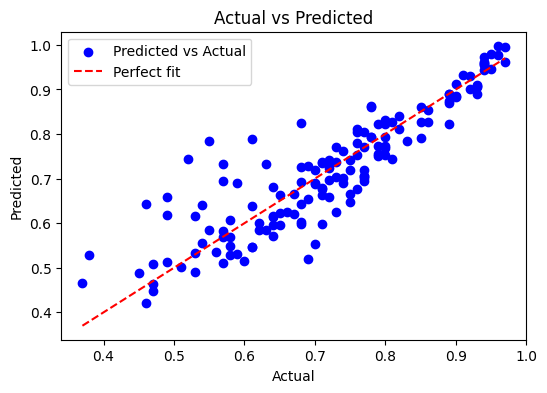

In [99]:
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_hat, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

### Ridge Regression

In [95]:
# Ridge Linear Regresion training
ridge = Ridge(1.0)
ridge.fit(X_train_scaled, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [96]:
# Prediction Using Ridge Model
ridge_y_hat = ridge.predict(X_test_scaled)
print(ridge_y_hat[:10])

[0.93115176 0.72479726 0.534411   0.9761847  0.54588609 0.62231457
 0.81144105 0.58513119 0.50754304 0.62550201]


In [97]:
# Coefficients and Intercept
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Coefficients: [0.02860539 0.01412294 0.00607209 0.00095011 0.01849093 0.06647984
 0.01320722]
Intercept: 0.7224857142857144


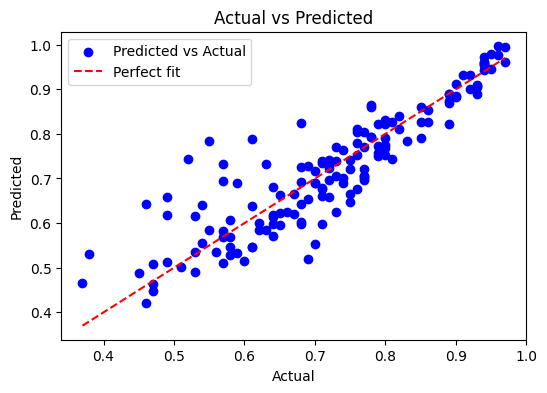

In [100]:
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, ridge_y_hat, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

### Lasso Regression

In [114]:
# Lasso Regression training
lasso = Lasso(0.1)
lasso.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [115]:
# Prediction Using Lasso Model
lasso_y_hat = lasso.predict(X_test_scaled)
print(lasso_y_hat[:10])

[0.75484582 0.72495737 0.68917543 0.77126342 0.69927857 0.70222531
 0.73463955 0.68454482 0.68286097 0.70348821]


In [116]:
# Coefficients And Intercept
print('Coefficients:',lasso.coef_)
print('Intercept:',lasso.intercept_)

Coefficients: [0.         0.         0.         0.         0.         0.02497807
 0.        ]
Intercept: 0.7224857142857143


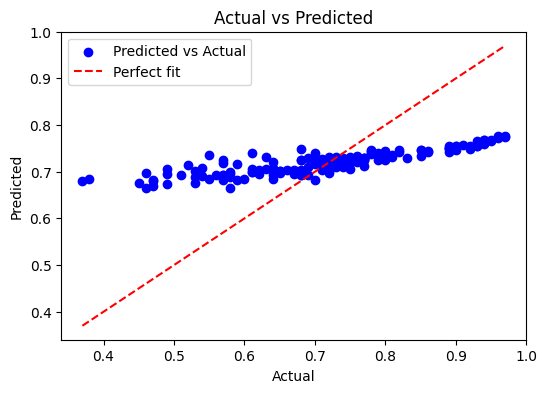

In [117]:
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, lasso_y_hat, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()